<a href="https://colab.research.google.com/github/Nikkuchan/BleepBot/blob/main/wav_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install library

In [1]:
#pip install speechrecognition

     |████████████████████████████████| 32.8 MB 146 kB/s 


In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

# Import library

In [2]:
import speech_recognition as sr

In [3]:
r = sr.Recognizer()
r

# Import audio file

In [5]:
# id file of gdrive shareable link
! gdown --id 18GAn2U28uRjcsI2-0dI1CknQLTtCcxzU

Downloading...
From: https://drive.google.com/uc?id=18GAn2U28uRjcsI2-0dI1CknQLTtCcxzU
To: /content/1.wav
100% 538k/538k [00:00<00:00, 113MB/s]


In [6]:
vaudio = sr.AudioFile('/content/1.wav')
with vaudio as source:
  audio = r.record(source, duration=5)

In [7]:
type(audio)

speech_recognition.AudioData

# Convert Audio to Text

In [8]:
text = r.recognize_google(audio, language="fil-PH")
text

'pre Tangina mo napakabango ba maglaro'

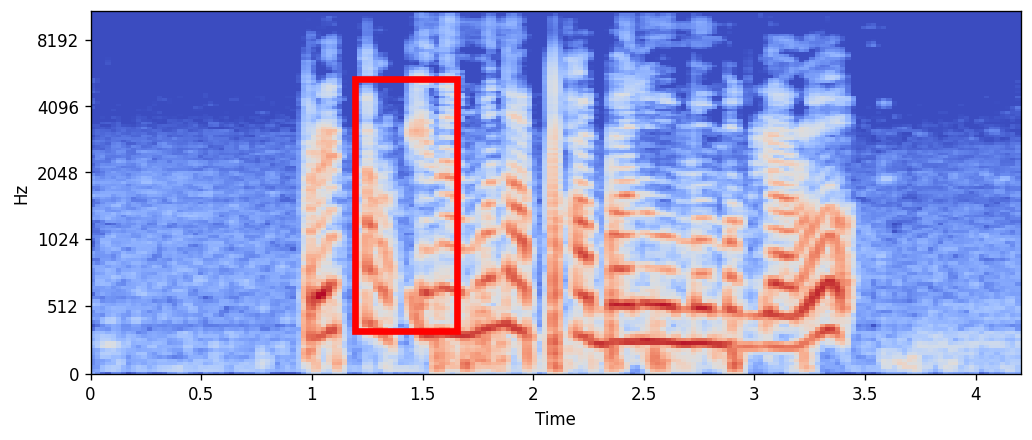

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

def txt2df(file):
    "Read txt file and returns labels dataframe"
    with open(file) as f:
        labels = f.read()
        labels = [l.split('\t') for l in labels.split('\n')][:-1]
        labels = [l for o in labels for l in o]
        labels = [l for l in labels]
        labels = [l for l in labels if l != '\\']
        labels = np.array(labels).reshape(-1, 5)
        df = pd.DataFrame({'start': labels[:,0].astype(float), 'end': labels[:,1].astype(float), 
                           'fmin': labels[:,3].astype(float), 'fmax': labels[:,4].astype(float),
                           'name': labels[:,2].astype(str)})
    return df

def rectangle(df_row, frequency):
    start, end, fmin, fmax = [df_row[o] for o in ['start', 'end','fmin', 'fmax']]
    if fmin == -1: fmin = 0
    if fmax == -1: fmax = frequency.max()
    xy = (start, fmin)
    width = end - start
    height = fmax - fmin
    return xy, width, height
  
# Spectrogram
data, sr = librosa.load('/content/1_labelled.wav')
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
spectrogram = librosa.power_to_db(spectrogram)

# Labels
labels = txt2df('/content/putangina_label.txt')

# Plot
fig, ax = plt.subplots(figsize=(10,4), dpi=120)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax);
for i in range(len(labels)):
    ax.add_patch(Rectangle(*rectangle(labels.iloc[i], ax.axis()[2:]), fc ='none', ec ='r', lw = 4))